<a href="https://colab.research.google.com/github/KoraySali/Dissertation_Archive/blob/main/Dissertation_Wildfire_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wildfire Image Detection Dissertation**

This file will include a number of important architectures, code and technologies. A Convolutional Neural Network (CNN) model will be used for the image detection of SMOKE, NO SMOKE, FIRE, NO FIRE classification.

A chosen methodology will be followed in order to prevent confusion when writting and coding this dissertation. Various evaluation metrics will be used to evaluate the outcome of the image detection model along with a number of visualisations for readability.

For copy/version issues a Github repository has been set up in order to retain versions and prevent loss of work.

The runtime of this file will be GPU as a CPU runtime took a lot longer to perform/execute our code.

## Linking our Google Drive to our ipynb file

An important step in this file is to link it to our Google Drive allowing for usability of the drive folder for uploading and downloading various files/folders.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


import os
os.chdir('/content/drive/My Drive/Dissertation')
folder = os.path.join('/content/drive/Dissertation')
!ls

Mounted at /content/drive
combined_train_images		       main_dataset
Dissertation_Wildfire_Detection.ipynb  test_big


## Importing our modules and libraries



In [3]:
import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import image
import os
import cv2
import matplotlib.image as mpimg
import random
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
# import splitfolders
import shutil

%matplotlib inline

## Pre-processing our dataset

We first begin by checking some of the images sizes.

In [49]:
import random

def select_random_images(folder, num_images):
    all_images = os.listdir(folder)
    selected_images = random.sample(all_images, num_images)
    return selected_images

num_images = 10 # Number of images you want to select
train_fire_images = select_random_images("/content/drive/My Drive/Dissertation/main_dataset/train_fire", num_images)
train_smoke_images = select_random_images("/content/drive/My Drive/Dissertation/main_dataset/train_smoke", num_images)
train_nofire_nosmoke_images = select_random_images("/content/drive/My Drive/Dissertation/main_dataset/train_nofire_nosmoke", num_images)

In [50]:
train_fire_images

['FIRE (329).png',
 'FIRE (40).jpg',
 '01904.jpg',
 '01143.jpg',
 'FIRE (1743).jpg',
 'FIRE (493).jpg',
 'FIRE (696).png',
 'FIRE (1313).jpg',
 'fire-1590.09832158.png',
 'FIRE (245).png']

In [64]:
from skimage import io, transform


def preprocess_images(images, folder, size=(128, 128)):
    processed_images = []
    for image in images:
      img = io.imread(os.path.join(folder, image))
      img = img.astype(float)
      img = img.astype(float) / 255.0
      img = transform.resize(img, size)
      processed_images.append(img)
    return np.array(processed_images)

preprocessed_train_fire_images = preprocess_images(train_fire_images, "/content/drive/My Drive/Dissertation/main_dataset/train_fire") 
preprocessed_train_smoke_images = preprocess_images(train_smoke_images, "/content/drive/My Drive/Dissertation/main_dataset/train_smoke")
preprocessed_train_nofire_nosmoke_images = preprocess_images(train_nofire_nosmoke_images, "/content/drive/My Drive/Dissertation/main_dataset/train_nofire_nosmoke")

In [69]:
preprocessed_train_smoke_images[9].shape

(128, 128, 3)

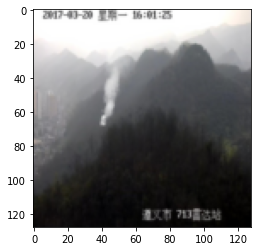

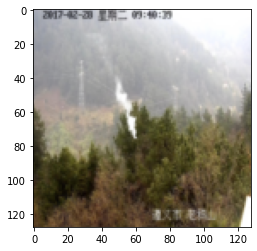

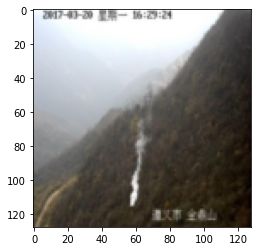

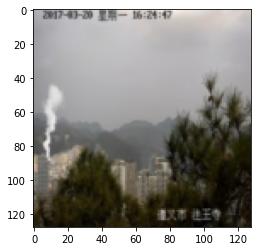

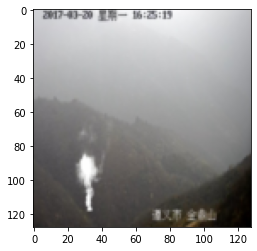

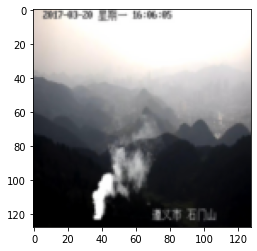

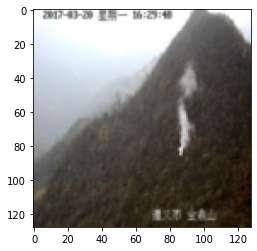

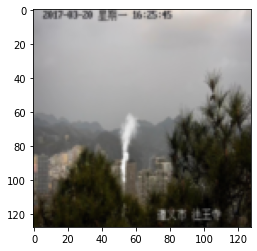

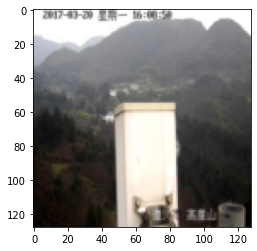

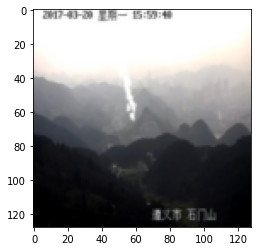

In [70]:
for image in preprocessed_train_smoke_images:
    plt.imshow(image)
    plt.show()

In [79]:
from keras.utils import to_categorical

# Labeling the train_fire_images as class 0
train_fire_labels = [0 for i in range(len(train_fire_images))]

# Labeling the train_smoke_images as class 1
train_smoke_labels = [1 for i in range(len(train_smoke_images))]

# Labeling the train_nofire_nosmoke_images as class 2
train_nofire_nosmoke_labels = [2 for i in range(len(train_nofire_nosmoke_images))]

# One-hot encoding the labels
train_fire_labels = to_categorical(train_fire_labels, num_classes=3)
train_smoke_labels = to_categorical(train_smoke_labels, num_classes=3)
train_nofire_nosmoke_labels = to_categorical(train_nofire_nosmoke_labels, num_classes=3)

In [80]:
train_smoke_labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [81]:
# Combining the preprocessed images and their labels
X_train = np.concatenate([preprocessed_train_fire_images, preprocessed_train_smoke_images, preprocessed_train_nofire_nosmoke_images])
y_train = np.concatenate([train_fire_labels, train_smoke_labels, train_nofire_nosmoke_labels])

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape, y_train.dtype)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (19, 128, 128, 3)
Train labels shape:  (19, 3) float32
Test data shape:  (5, 128, 128, 3)
Test labels shape:  (5, 3)


In [84]:
mean_pixel = X_train.mean(axis=(0, 1, 2), keepdims=True)
std_pixel = X_train.std(axis=(0, 1, 2), keepdims=True)
X_train = (X_train - mean_pixel) / std_pixel
X_test = (X_test - mean_pixel) / std_pixel

In [89]:
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape, y_train.dtype)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (19, 128, 128, 3)
Train labels shape:  (19, 3) float32
Test data shape:  (5, 128, 128, 3)
Test labels shape:  (5, 3)


Label all images in the train folders

## Model Creation

In [90]:
from numpy.random import seed
seed(1)
tf.random.set_seed(1)

In [ ]:
# Defining Model Architecture 

Epoch 1/10
